# Simulation of limiting current analysis (LCA) measurements using a simple 2D diffusion model

This example uses a coarse rib/channel structure (1.0 mm ribs, 1.0 mm channels).

In [1]:
from pyfcsim import set_def_params, sim_lca

In [2]:
base_case = {
    'physics':{
        'R':8.3145,
        'F':96485,
        'z':4,
        'D_O2_N2_1bar':0.3e-4,  # O2 diffusivity in N2 at 1 bar [m^2/s]
        'D_O2_He_1bar':1e-4,    # O2 diffusivity in He at 1 bar [m^2/s]
        'c0':44.6               # O2 concentration in normal conditions (1.01325 bar, 0°C) [mol/m^3]
        },
    'conditions':{
        'p': 2.3e5,             # Total pressure in [N/m^2]
        'T': 353.15,            # Temperature in [K]
        'carrier': 'N2',        # Carrier gas
        'RH':1.0,               # relative humidity [unitless]
        'x_O2': 0.208,          # O2 molar fraction in dry gas [unitless]
        'alpha': 1.0,           # transfer coefficient [unitless]
        'gamma': 1.0,           # order of reaction [unitless]
        'heta_min': 0.2,        # minimum overpotential [V]
        'heta_max': 1.0         # maximum overpotential [V]
        },
    'geometry':{
        'rib_width': 1.0e-3,    # rib width in [m]
        'chan_width': 1.0e-3,   # channel width in [m]
        'GDL_thick': 125e-6,    # GDl thickness in [m]
        'MPL_thick': 50e-6,     # MPL thickness in [m]
        'CL_thick': 5e-6,       # CL thickness in [m]
        'MEM_thick': 20e-6,     # membrane thickness in [m]
        'rib_ndiv': 10,          # number of divisions for the rib area
        'chan_ndiv': 10,        # number of divisions for the channel area
        'GDL_ndiv': 13,         # number of divisions over the GDL thickness
        'MPL_ndiv': 10,         # number of divisions over the MPL thickness
        'CL_ndiv': 10           # number of divisions over the CL thickness
        },
    'materials':{
        'GDL_Drel_TP':0.25,      # Relative through plane diffusivity in the GDL [-]
        'GDL_Drel_IP':0.4,      # Relative in plane diffusivity in the GDL [-]
        'MPL_Drel':0.25,        # Relative diffusivity in the MPL [-]
        'CL_Drel':0.25,         # Relative diffusivity in the CL [-]
        'MPL_Dknud':5e-5,       # Knudsen diffusivity in the MPL [m^2/s]
        'CL_Dknud':1e-5,        # Knudsen diffusivity in the CL [m^2/s]
        'CL_Rfilm':5000,        # O2 transport resistance of the ionomer film [s/m]
        'CL_SAD':20e6,          # Surface area density in 1/m (m^2/m^3)
        'MEM_cond':5,           # Membrane ionic conductivity in [1/(Ohm*m)]
        'CL_cond':1,            # CL effective ionic conductivity in [1/(Ohm*m)]
        'CL_i0': 2e-4,          # exchange current density per Pt surface in [A/m^2] at c0
        'Elec_res': 1e-6,       # total electrical resistivity [Ohm*m^2]
        'GDL_porosity':0.8, 
        'MPL_porosity':0.7,
        'CL_porosity':0.55
        }
    }

In [3]:
set_def_params(base_case)

## Base case: R<sub>O2,film</sub> =  5'000 [s·m<sup>-1</sup>], ρ<sub>CL</sub> = [1.0 Ω<sup>-1</sup>·m<sup>-1</sup>]

Note: the O<sub>2</sub> diffusion resistance through thionomer film is referring to the catalyst surface. With the roughness factor of 100 in the base case, the 5'000 [s·m<sup>-1</sup>] corresponds to a diffusion resistance of 50 [s·m<sup>-1</sup>] when referring to the cell geometrical area.

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 21.56it/s]


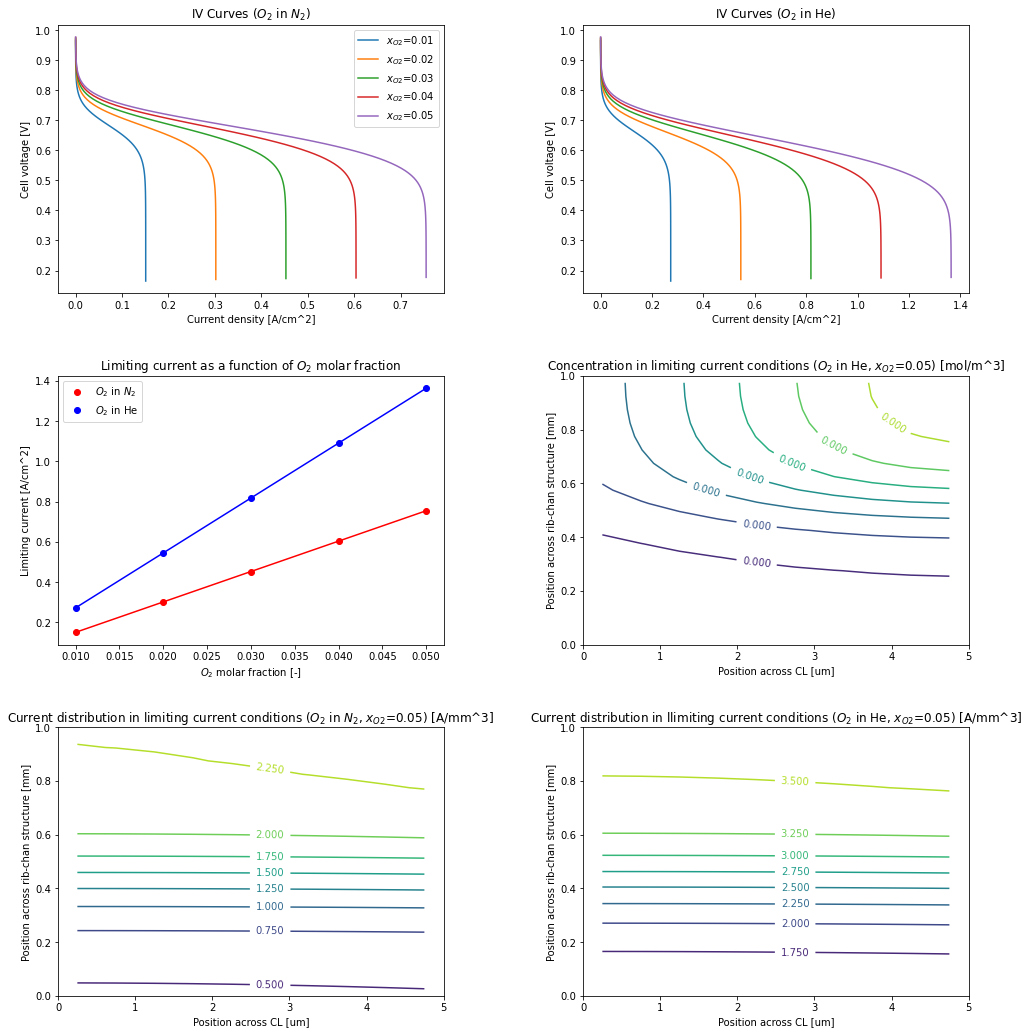

Transport resistance (O2 in N2): 158.93 s/m
Transport resistance (O2 in He): 88.00 s/m


In [4]:
sim_lca()

## Variation of film resistance

The catalyst layer is kept to its base case conductivity of [1.0 Ω<sup>-1</sup>·m<sup>-1</sup>]

### R<sub>O2,film</sub> = 10'000 [s·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 22.58it/s]


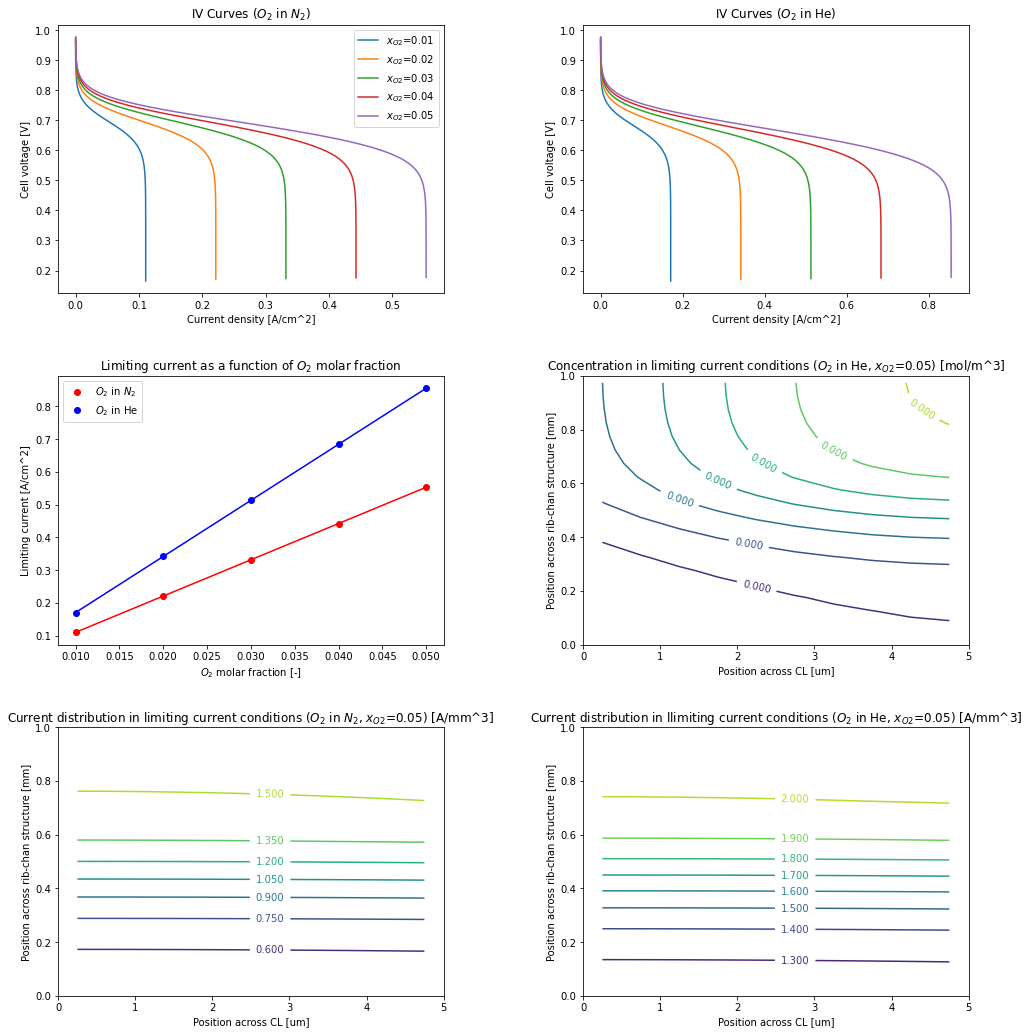

Transport resistance (O2 in N2): 216.91 s/m
Transport resistance (O2 in He): 140.31 s/m


In [5]:
sim_lca(CL_Rfilm=10000)

### R<sub>O2,film</sub> = 15'000 [s·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 24.71it/s]


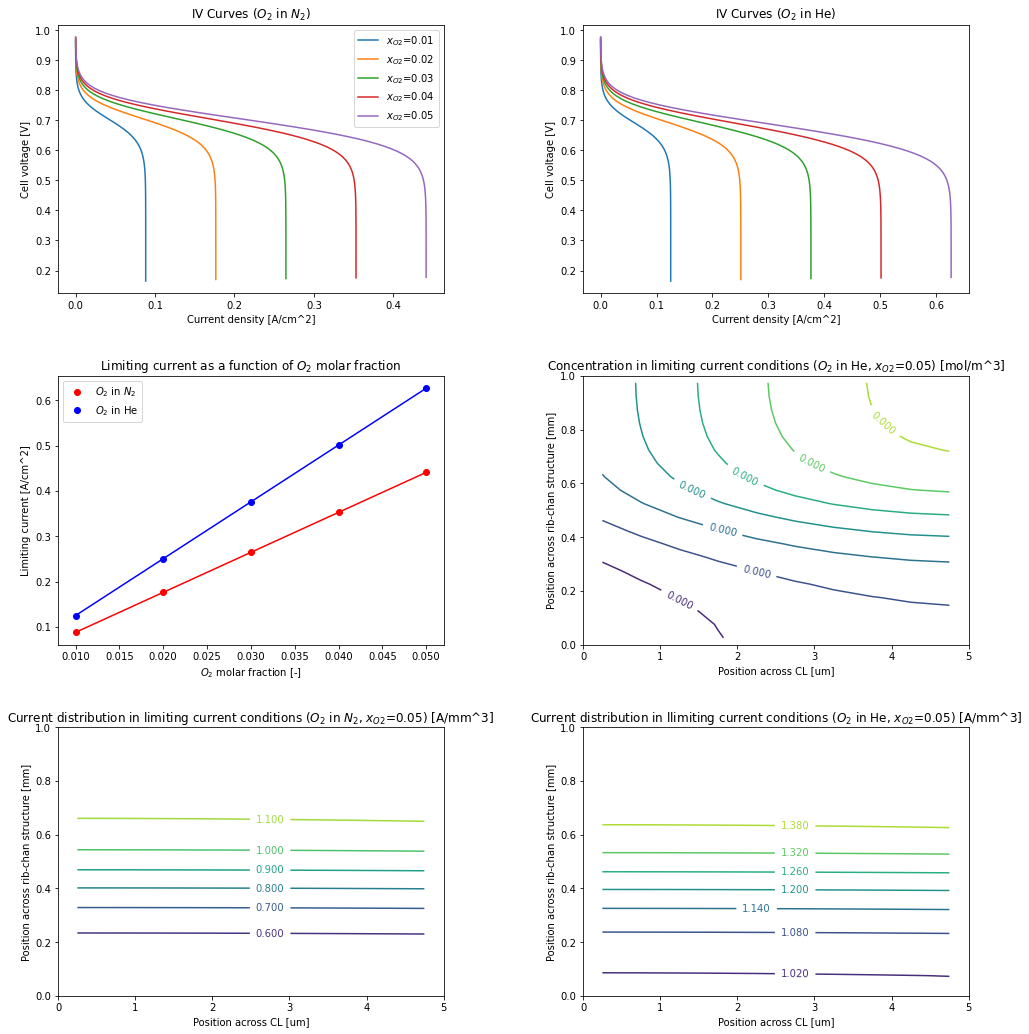

Transport resistance (O2 in N2): 271.92 s/m
Transport resistance (O2 in He): 191.39 s/m


In [6]:
sim_lca(CL_Rfilm=15000)

### R<sub>O2,film</sub> = 20'000 [s·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 24.90it/s]


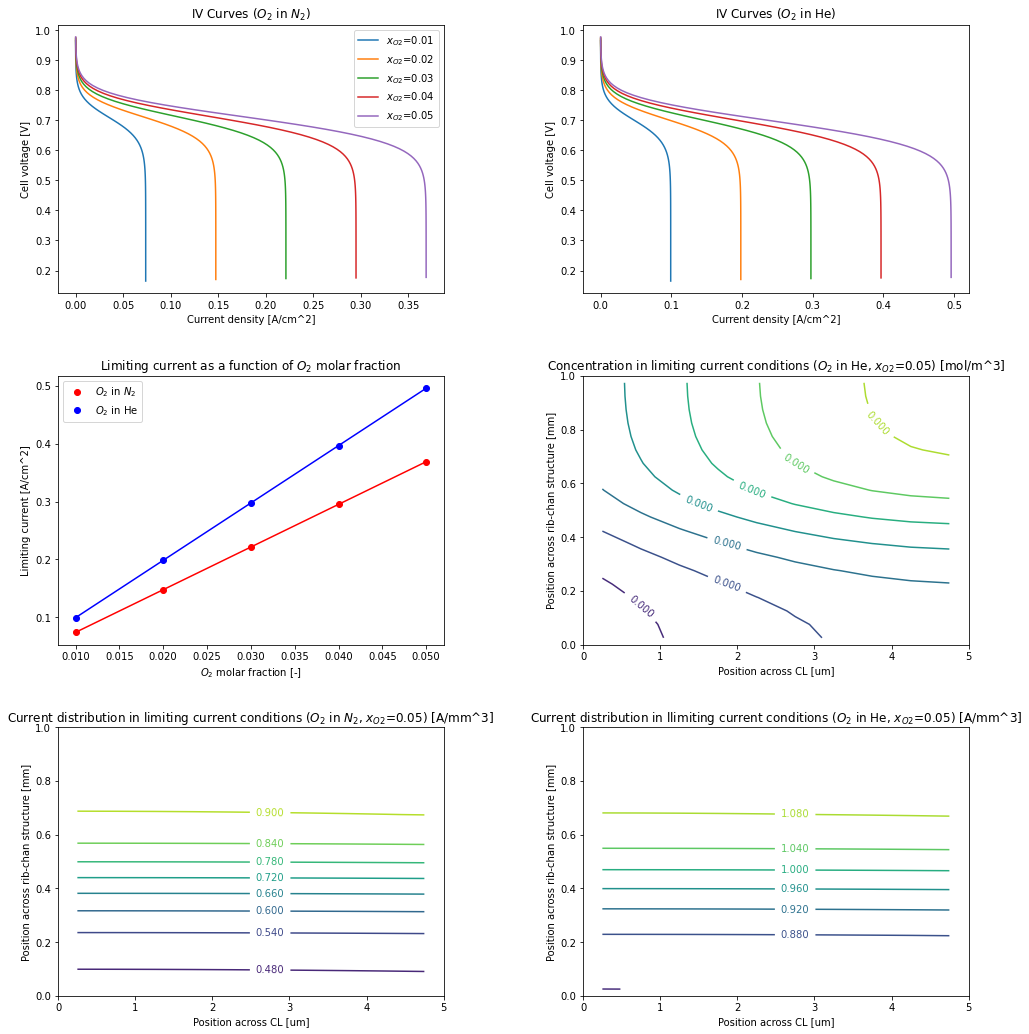

Transport resistance (O2 in N2): 325.35 s/m
Transport resistance (O2 in He): 242.01 s/m


In [7]:
sim_lca(CL_Rfilm=20000)

## Variations of CL ionic conductivity

The film resistance is kept to its base case value of 5'000 [s·m<sup>-1</sup>]).

### ρ<sub>CL</sub> = [0.5 Ω<sup>-1</sup>·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 23.54it/s]


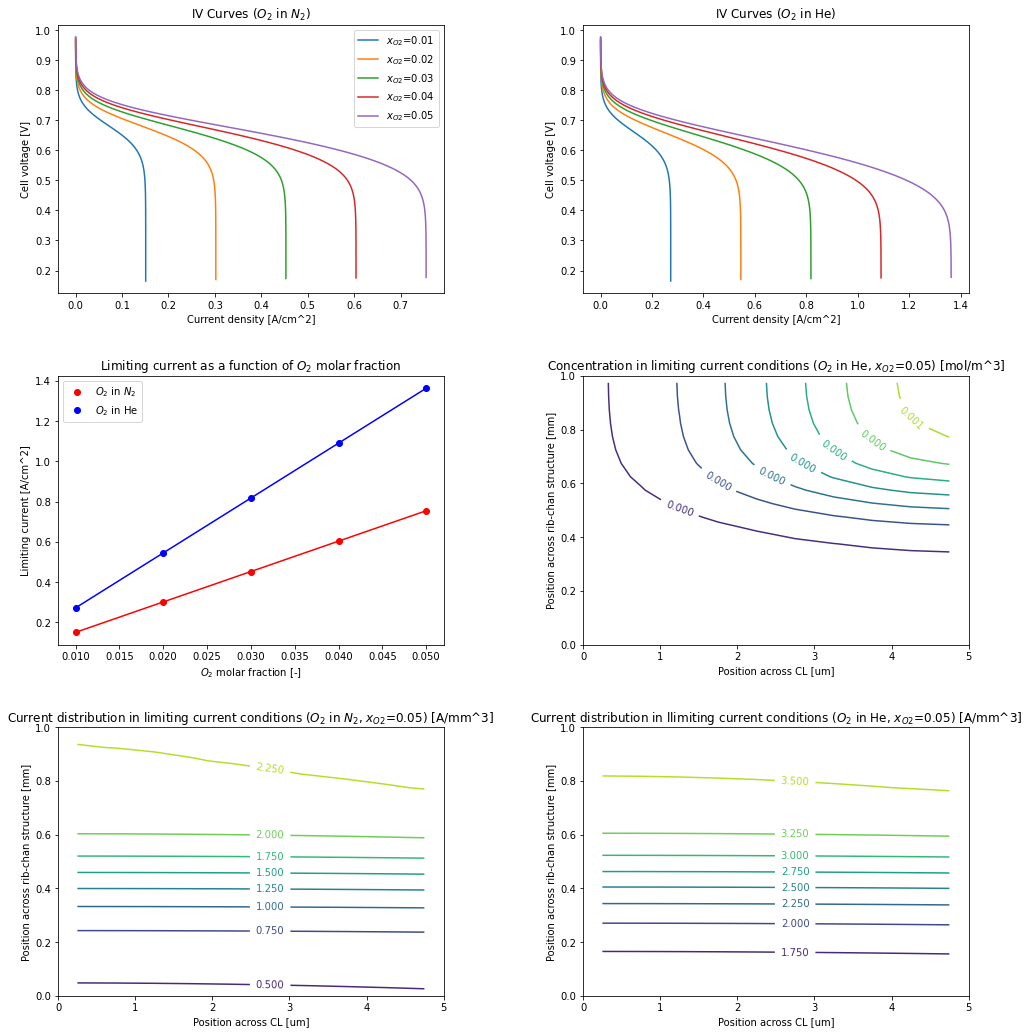

Transport resistance (O2 in N2): 158.93 s/m
Transport resistance (O2 in He): 88.00 s/m


In [8]:
sim_lca(CL_cond=0.5)

### ρ<sub>CL</sub> = [0.25 Ω<sup>-1</sup>·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 22.98it/s]


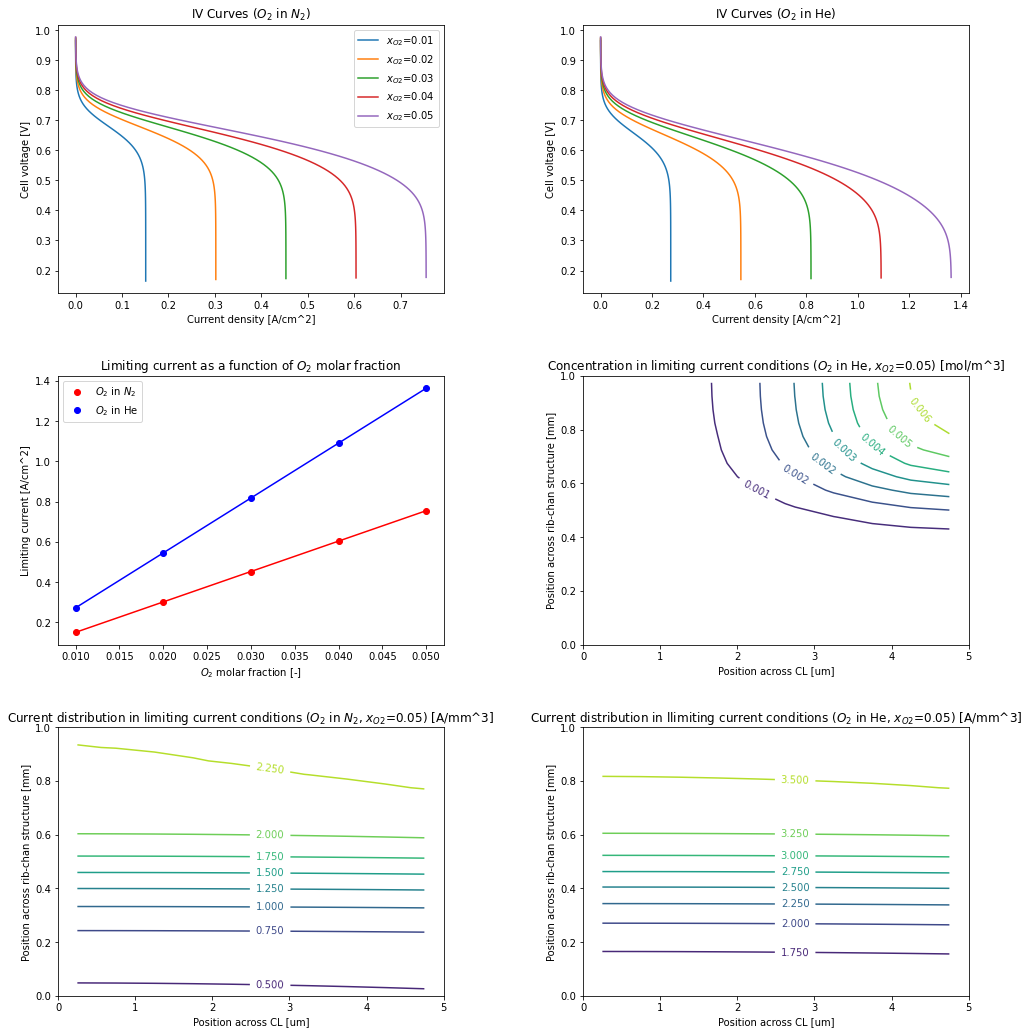

Transport resistance (O2 in N2): 158.93 s/m
Transport resistance (O2 in He): 88.04 s/m


In [9]:
sim_lca(CL_cond=0.25)

### ρ<sub>CL</sub> = [0.1 Ω<sup>-1</sup>·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 22.35it/s]


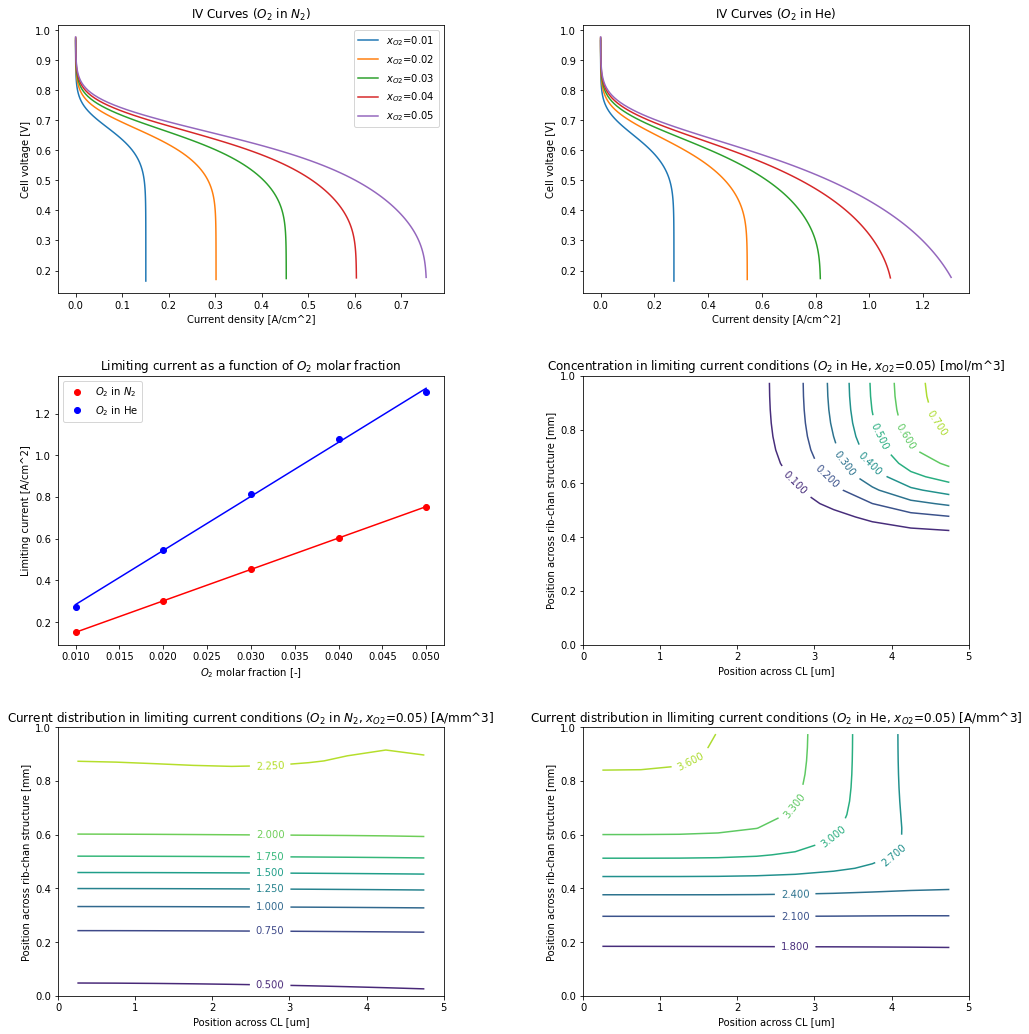

Transport resistance (O2 in N2): 159.21 s/m
Transport resistance (O2 in He): 92.51 s/m


In [10]:
sim_lca(CL_cond=0.1)

## CL conductivity impact in absence of film resistance

The film resistance is set to a very low value (50 [s·m<sup>-1</sup>]).

### ρ<sub>CL</sub> = [10.0 Ω<sup>-1</sup>·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 22.35it/s]


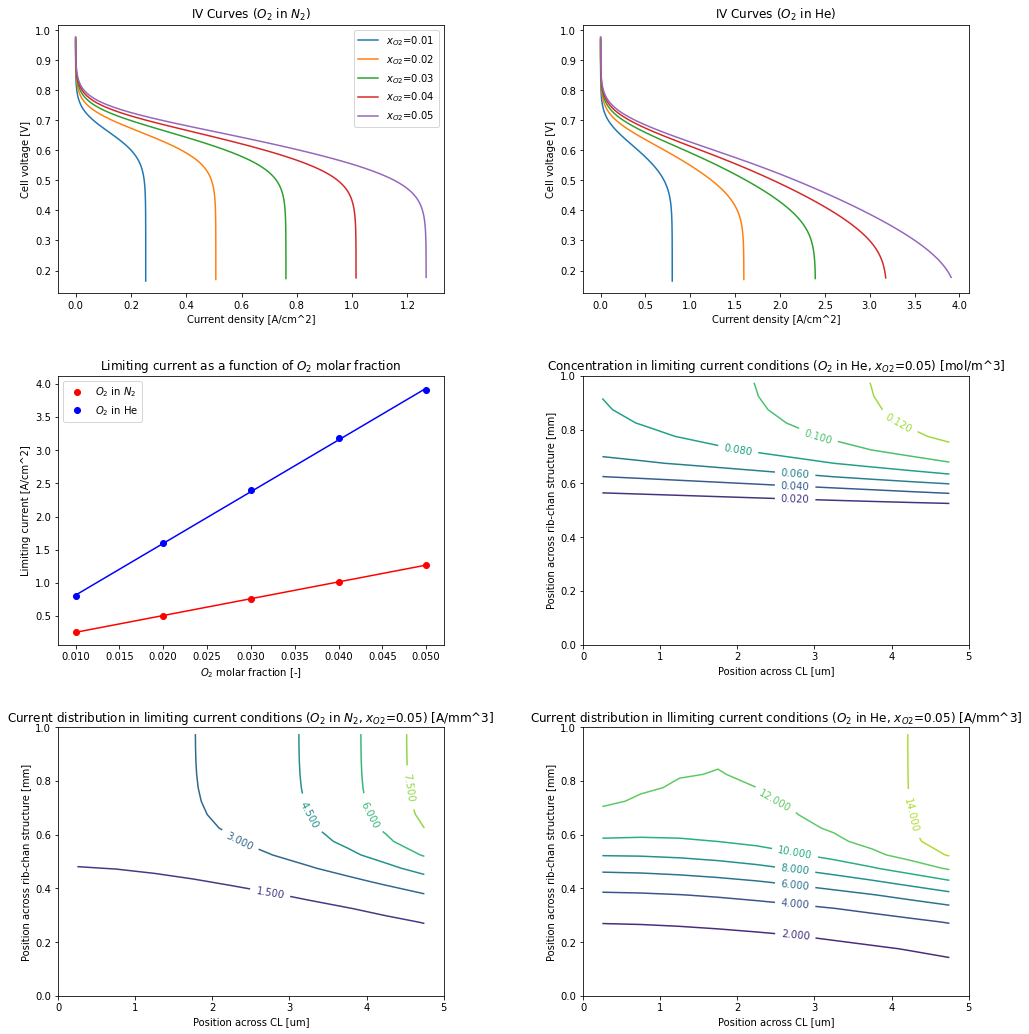

Transport resistance (O2 in N2): 94.67 s/m
Transport resistance (O2 in He): 30.77 s/m


In [11]:
sim_lca(CL_Rfilm=50, CL_cond=10)

### ρ<sub>CL</sub> = [0.1 Ω<sup>-1</sup>·m<sup>-1</sup>]

Computing Helox IV, xO2=0.05: 100%|██████████| 100/100 [00:04<00:00, 22.31it/s]


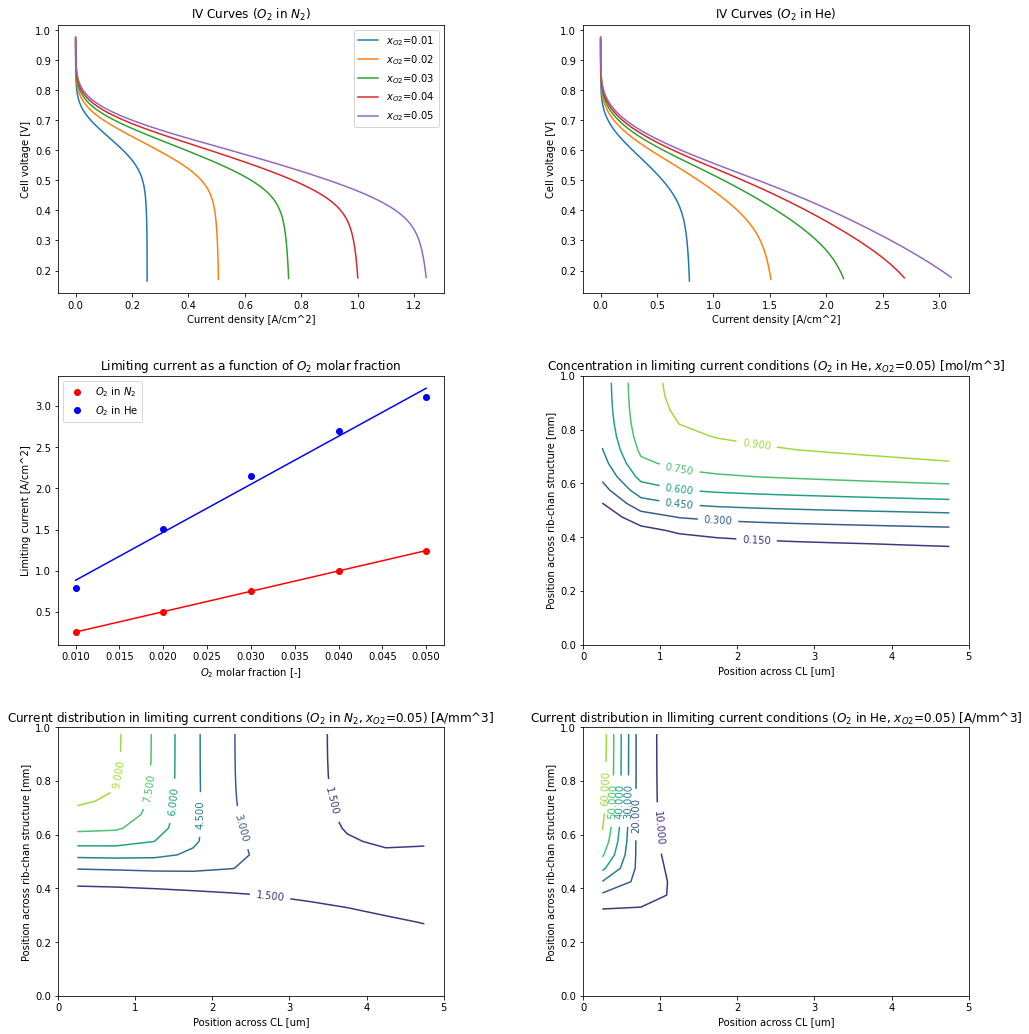

Transport resistance (O2 in N2): 97.09 s/m
Transport resistance (O2 in He): 41.20 s/m


In [12]:
sim_lca(CL_Rfilm=50, CL_cond=0.1)